In [4]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

The following variables are defined:
Flare start time, flare stop time, flare energy, the absolute value of the flare energies (still have to sort negative flares out, should be ignored in final product), logarithm of energy, number of data points (reflects time length of sampled data), number of flares, time between data point (between each kepler reading), total time, and possibly rate. Note, Totaldays is key here. Must be in denominator. Need reverse cumulative sum as function of energy.

In [5]:
# Here i'm making the function for my plot and all files.

def JonFunc(x,y,doplot=False,xlimit=(2,10),figname='Myfigure.png'):
    print(x)
    ynew=y*2
    if doplot is True:
        plt.plot(x,ynew)
        plt.title('Myplot')
        plt.xlim(xlimit)
        plt.savefig(figname,dpi=300)
    return ynew

In [6]:
time, flux =np.loadtxt('6224062.dat',usecols=(0,1),unpack=True)

t_start, t_stop, energy =np.loadtxt('6224062.txt',usecols=(4,5,9),unpack=True)
#for line in t_start:
#    print(line)

absE=abs(energy)

logE=np.log10(absE)

Numbdata=len(time)

Numbflares=len(energy)

dt=time[1:]-time[:-1]
expt=np.median(dt)

Totaldays=Numbdata*expt

Rate=Numbflares/Totaldays

print(Rate)


0.858736190522


Transfered data from IDL to Python to refer to sample flare data.

(240, 245)

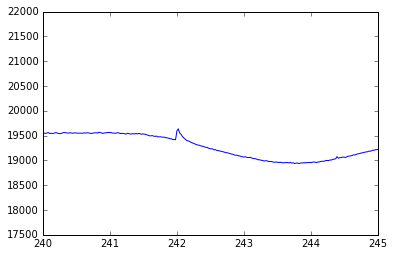

In [7]:
plt.plot(time, flux)
plt.xlim([240,245])

Attempted at plotting logarithm of energy, hoping to get the graph intended for final product (Something is not good here).

In [8]:
samplex=([0,1136])
x=np.array(samplex)
y=np.array(logE)
#plt.plot(x,y)

Two different Histograms of data, difference is bin numbers (Not sure prefered amount).

(0, 500)

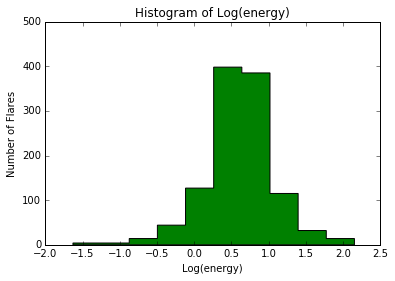

In [9]:
plt.hist(logE,facecolor='green',histtype='stepfilled')
plt.title("Histogram of Log(energy)")
plt.xlabel("Log(energy)")
plt.ylabel("Number of Flares")
plt.ylim([0,500])

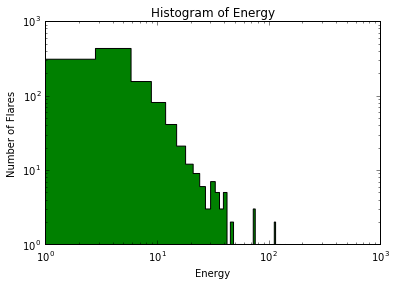

In [10]:
plt.hist(energy,50,facecolor='green',histtype='stepfilled')
plt.title("Histogram of Energy")
plt.xlabel("Energy")
plt.ylabel("Number of Flares")
#plt.ylim([0,120])
plt.yscale('log')
plt.xscale('log')

Very rough attempts at incorperating rate, final graph is very much forced into looking like final producted desired.

In [11]:
#plt.hist(logE,Rate,facecolor='green')
#plt.title("Histogram of Log(energy) VS. Rate")
#plt.xlabel("Log(energy)")
#plt.ylabel("Rate of Flares (Number per Day)")

6 8 26 23 117 957


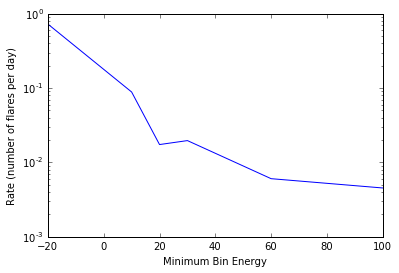

In [12]:
#hi = 0
#for i in range(len(logE)):
#    for j in range(i+1, len(logE)):
#        if (j) > 0:
#            hi = max(hi, j)
#            l=[]
#            l.extend(range(len(logE)))
#print(l)
#plt.plot(l)
a=0
b=0
c=0
d=0
e=0
f=0
for i in energy:
    if (i) > 100:
        a=a+1
    elif (i) > 60:
        b=b+1
    elif (i) > 30:
        c=c+1
    elif (i) > 20:
        d=d+1
    elif (i) > 10:
        e=e+1
    elif (i) > -20:
        f=f+1
    
    
print(a,b,c,d,e,f)

#ls=[1/a,1/b,1/c,1/d,1/e,1/f]

#plt.plot(ls)

binE=np.array([100,60,30,20,10,-20])
binR=np.array([a,b,c,d,e,f])/Totaldays
plt.plot(binE,binR)
plt.yscale('log')
plt.xlabel('Minimum Bin Energy')
plt.ylabel('Rate (number of flares per day)')


A first draft (non-continuous) of FFD (Flare Frequency Distribution) (y axis is cumulative flares per day)

Cumulative Distribution is below.

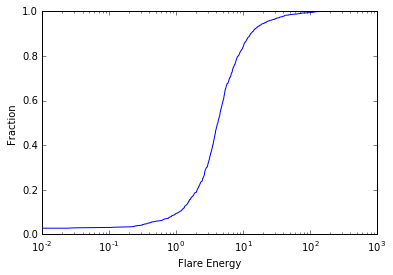

In [13]:
SS=np.argsort(energy)
energy[SS]
#plt.plot(energy)
plt.plot(energy[SS],np.arange(0,len(energy))/len(energy))
plt.xscale('log')
plt.xlabel('Flare Energy')
plt.ylabel('Fraction')

(0.0001, 1)

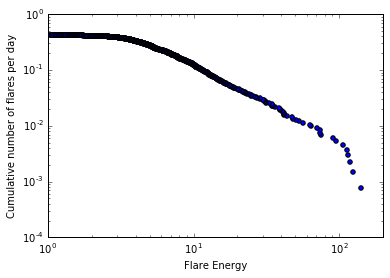

In [14]:
plt.scatter(energy[SS][::-1],
         np.cumsum(np.arange(0,len(energy))[::-1]/len(energy))/Totaldays)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Flare Energy')
plt.ylabel('Cumulative number of flares per day')
plt.xlim(1,200)
plt.ylim(1e-4,1)

https://github.com/jradavenport/jradavenport_idl/blob/master/perror.pro

Note to self, error replication can be found here under perror, in IDL. Need asymmetric for Python.

In [15]:
err_dn = np.abs(n*(1.-1./(9.*n)-1./(3.*np.sqrt(n)))**3.-n)
    err_up = n+np.sqrt(n+0.75)+1.0-n

IndentationError: unexpected indent (<ipython-input-15-71f2094b1606>, line 2)

Current goal: remake this plot with asymmetric error bares, up and down. If possible, fit a line. Ideally, generalize for all forms of data, including multiple files.

[0 1 2 3 4 5 6 7 8 9]


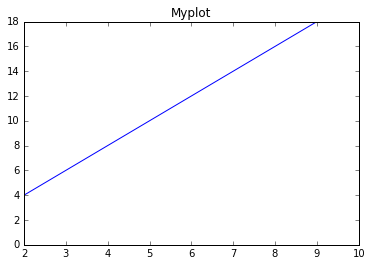

In [18]:
a = JonFunc(np.arange(10), np.arange(10), doplot=True)

In [ ]:
# Start the TRUE JonFunc here: